In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AT50_e.csv")
df

,Time,X,Y,Z,Vx,Vy,Vz,dVel_X,dVel_Y,dVel_Z,Alt(m)
0,1.0,-2898223.01,4027640.48,3994030.69,-10.31,4.23,7.68,-10.31,4.23464,7.68321,58.28
1,2.0,-2898250.63,4027649.17,3994049.56,-21.85,7.21,15.14,-11.54,2.97611,7.45338,88.17
2,3.0,-2898287.50,4027664.35,3994077.06,-31.86,12.52,23.38,-10.01,5.30697,8.24089,131.78
3,4.0,-2898332.32,4027687.94,3994113.84,-40.50,19.90,32.32,-8.64,7.38467,8.93850,190.16
4,5.0,-2898385.40,4027719.63,3994159.84,-48.89,27.76,41.44,-8.38,7.86052,9.12520,263.20
...,...,...,...,...,...,...,...,...,...,...,...
360,361.0,-3375189.86,3649597.19,3987163.13,-187.98,-1178.71,-595.93,27.69,30.56112,3.10060,2774.38
361,362.0,-3375337.47,3648467.55,3986574.36,-161.07,-1146.00,-591.15,26.91,32.71108,4.78250,1837.29
362,363.0,-3375459.53,3647373.64,3985992.90,-135.06,-1111.27,-584.69,26.00,34.72814,6.45771,911.80
363,364.0,-3375557.15,3646317.16,3985420.31,-110.10,-1074.74,-576.62,24.96,36.52314,8.07370,0.45


In [3]:
df.dtypes

Time      float64
X         float64
Y         float64
Z         float64
Vx        float64
Vy        float64
Vz        float64
dVel_X    float64
dVel_Y    float64
dVel_Z    float64
Alt(m)    float64
dtype: object

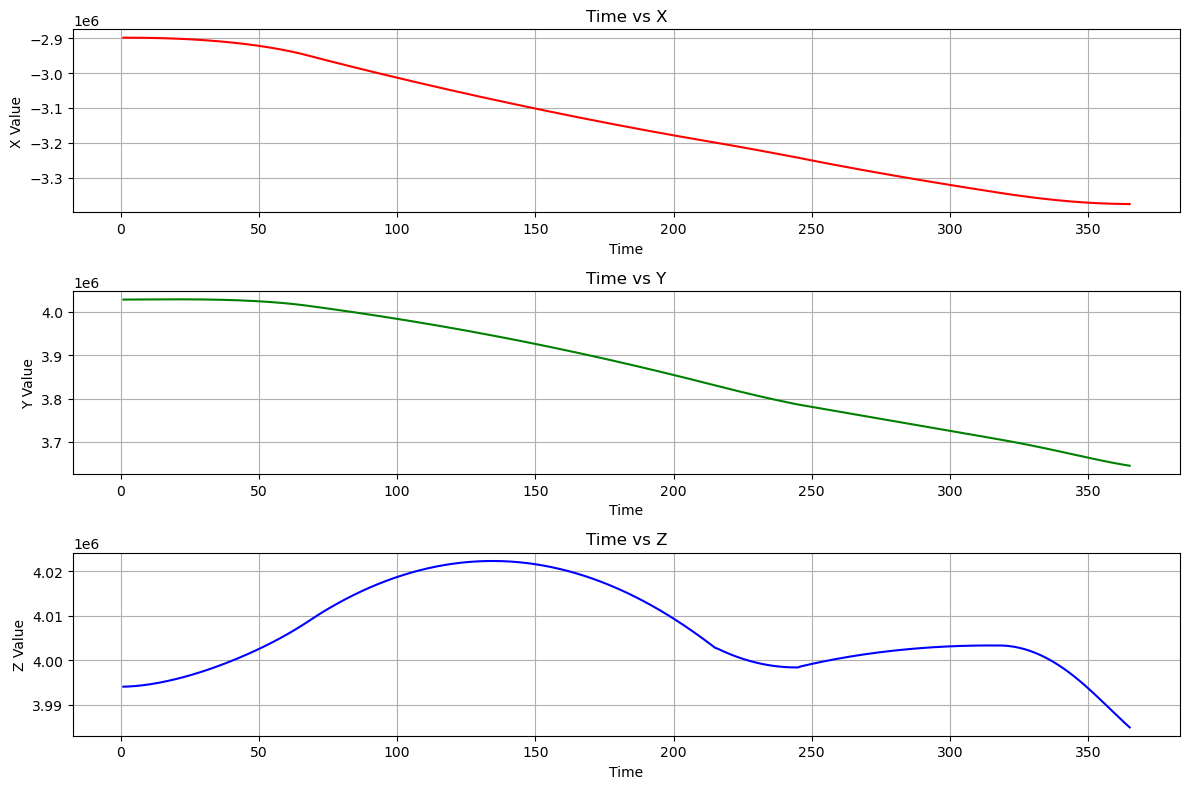

In [4]:
plt.figure(figsize=(12, 8))

# 'X' 값에 대한 그래프
plt.subplot(3, 1, 1)
plt.plot(df['Time'], df['X'], label='X', color='red')
plt.title('Time vs X')
plt.xlabel('Time')
plt.ylabel('X Value')
plt.grid(True)

# 'Y' 값에 대한 그래프
plt.subplot(3, 1, 2)
plt.plot(df['Time'], df['Y'], label='Y', color='green')
plt.title('Time vs Y')
plt.xlabel('Time')
plt.ylabel('Y Value')
plt.grid(True)

# 'Z' 값에 대한 그래프
plt.subplot(3, 1, 3)
plt.plot(df['Time'], df['Z'], label='Z', color='blue')
plt.title('Time vs Z')
plt.xlabel('Time')
plt.ylabel('Z Value')
plt.grid(True)

plt.tight_layout()
plt.show()

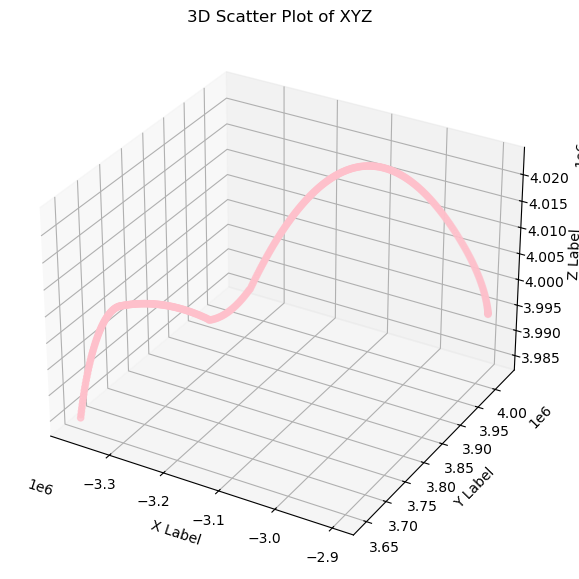

In [5]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['X'], df['Y'], df['Z'], c='pink', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_title('3D Scatter Plot of XYZ')

plt.show()

In [6]:
df_filtered_origin = df.loc[~((df['Time'] > 20.) & (df['Time'] < 50.) |
                       (df['Time'] > 130.) & (df['Time'] < 170.) |
                       (df['Time'] > 230.) & (df['Time'] < 260.))]

In [7]:
blanc_mask = ~np.in1d(np.arange(df_filtered_origin.index[-1]+1), df_filtered_origin.index)

In [8]:
df_filtered = df_filtered_origin.copy()

In [9]:
df_filtered = df_filtered.reset_index(drop=True)

In [10]:
import numpy as np
import pandas as pd

In [11]:
time_square = max(len(str(time).split('.')[1]) for time in df_filtered.Time if '.' in str(time))

In [12]:
df_filtered.Time = (df_filtered.Time * 10 ** time_square).round().astype(int)

interval_list = []

for i in range(1, len(df_filtered)):
    interval = df_filtered.Time[i] - df_filtered.Time[i-1]
    interval_list.append(interval)

In [13]:
max(interval_list)

400

In [14]:
def gcd(a, b):
    while b != 0:
        a, b = b, a%b
    return a

In [15]:
temp = interval_list[0]
for i in range(1, len(interval_list)):
    temp = gcd(temp, interval_list[i])

In [16]:
interval = temp

In [17]:
interval

10

In [18]:
time_cursor = df_filtered.Time[0]
last_time = df_filtered.iloc[-1].Time
time_set = set(df_filtered['Time'])
while last_time != time_cursor:
    time_cursor += interval
    if not time_cursor in time_set:
        temp_df = pd.DataFrame([time_cursor], columns=['Time'])
        df_filtered = pd.concat([df_filtered, temp_df])

In [19]:
df_filtered = df_filtered.sort_values(by='Time').reset_index(drop=True)

In [20]:
df_filtered.head(10)

,Time,X,Y,Z,Vx,Vy,Vz,dVel_X,dVel_Y,dVel_Z,Alt(m)
0,10,-2898223.01,4027640.48,3994030.69,-10.31,4.23,7.68,-10.31,4.23464,7.68321,58.28
1,20,-2898250.63,4027649.17,3994049.56,-21.85,7.21,15.14,-11.54,2.97611,7.45338,88.17
2,30,-2898287.50,4027664.35,3994077.06,-31.86,12.52,23.38,-10.01,5.30697,8.24089,131.78
3,40,-2898332.32,4027687.94,3994113.84,-40.50,19.90,32.32,-8.64,7.38467,8.93850,190.16
4,50,-2898385.40,4027719.63,3994159.84,-48.89,27.76,41.44,-8.38,7.86052,9.12520,263.20
5,60,-2898449.88,4027756.05,3994214.34,-59.28,33.53,50.15,-10.39,5.77023,8.70512,349.74
6,70,-2898527.15,4027795.86,3994277.13,-71.27,37.72,58.57,-11.99,4.18478,8.42422,449.44
7,80,-2898618.15,4027838.18,3994348.05,-84.42,40.78,66.81,-13.15,3.06362,8.23535,562.07
8,90,-2898723.68,4027882.19,3994426.97,-98.50,42.94,74.88,-14.07,2.15500,8.07574,687.40
9,100,-2898844.53,4027927.07,3994513.71,-113.40,44.23,82.79,-14.90,1.29752,7.90467,825.16


In [21]:
# def interpolate(df):
#     from scipy.interpolate import interp1d
    
#     temp_df = df
#     # 'Time'에 따라 보간할 컬럼을 지정
#     for column in ['X', 'Y', 'Z']:
#         valid = ~df[column].isnull()
#         if valid.any():  # 유효한 데이터가 있는 경우에만 보간
#             interpolator = interp1d(df.loc[valid, 'Time'], df.loc[valid, column], 
#                                     kind='cubic', fill_value='extrapolate')
#             # 누락된 데이터가 있는 시간에 대해서만 값을 보간
#             temp_df[column] = interpolator(df['Time'])
        
#     return temp_df

In [22]:
# temp_df = interpolate(df_filtered)

In [23]:
# temp_df.tail(50)

In [24]:
def interpolate(df, kind):
    from scipy.interpolate import interp1d
    
    temp_df = df.copy()
    for column in ['X', 'Y', 'Z']:
        valid = ~temp_df[column].isnull()
        if valid.any():
            interpolator = interp1d(temp_df.loc[valid, 'Time'], temp_df.loc[valid, column], 
                                    kind=kind, fill_value='extrapolate')
            temp_df.loc[:, column] = interpolator(df['Time'])
    
    return temp_df

In [25]:
kinds = ['linear', 'nearest', 'slinear', 'quadratic', 'cubic']
results = {}

for kind in kinds:
    results[kind] = interpolate(df_filtered, kind)

In [26]:
linear_interpolated = results['linear']
nearest_interpolated = results['nearest']
slinear_interpolated = results['slinear']
quadratic_interpolated = results['quadratic']
cubic_interpolated = results['cubic']

In [27]:
df_filtered_origin.isnull().count()

Time      268
X         268
Y         268
Z         268
Vx        268
Vy        268
Vz        268
dVel_X    268
dVel_Y    268
dVel_Z    268
Alt(m)    268
dtype: int64

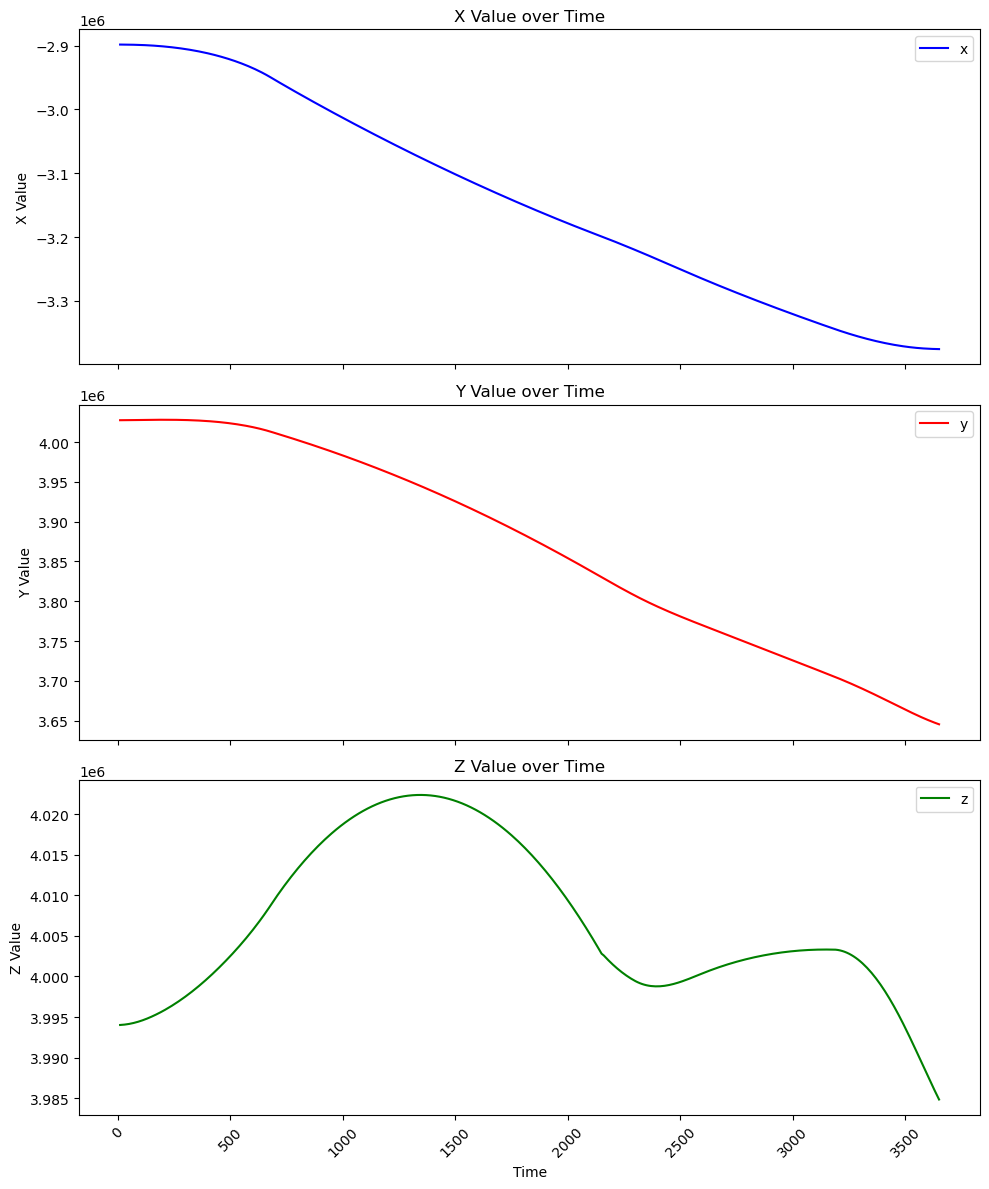

In [28]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# X 값 그래프
axs[0].plot(cubic_interpolated['Time'], cubic_interpolated['X'], label='x', color='blue')
axs[0].set_title('X Value over Time')
# axs[0].xaxis.set_major_formatter(time_format)
axs[0].set_ylabel('X Value')

# Y 값 그래프
axs[1].plot(cubic_interpolated['Time'], cubic_interpolated['Y'], label='y', color='red')
axs[1].set_title('Y Value over Time')
# axs[1].xaxis.set_major_formatter(time_format)
axs[1].set_ylabel('Y Value')

# Z 값 그래프
axs[2].plot(cubic_interpolated['Time'], cubic_interpolated['Z'], label='z', color='green')
axs[2].set_title('Z Value over Time')
# axs[2].xaxis.set_major_formatter(time_format)
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Z Value')

# 축 레이블 회전 및 레이아웃 조정
for ax in axs:
    ax.legend()
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.tight_layout()
plt.show()


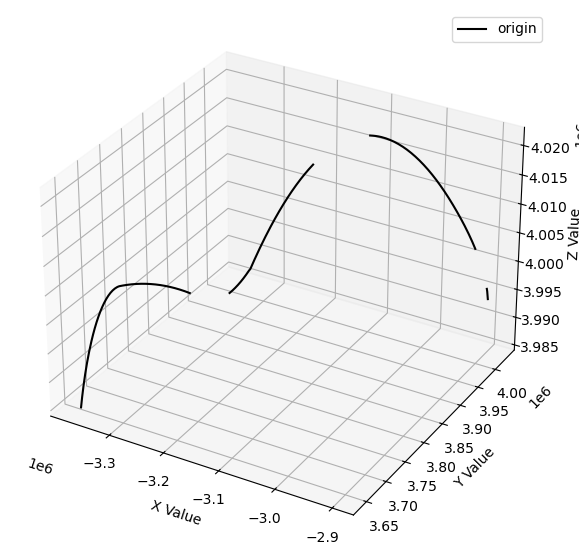

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 각 보간 방법에 대한 데이터를 그래프에 추가

ax.plot3D(df_filtered['X'], df_filtered['Y'], df_filtered['Z'], 'black', label='origin')


ax.set_xlabel('X Value')
ax.set_ylabel('Y Value')
ax.set_zlabel('Z Value')
ax.legend()


plt.show()


In [30]:
empty_idx = df_filtered[df_filtered['X'].isna()].index
empty_idx1 = empty_idx[:29]
empty_idx2 = empty_idx[30:68]
empty_idx3 = empty_idx[69:]


In [31]:
# # 각 보간 방법에 따른 X 값의 오프셋을 설정
# offsets = {
#     'origin': 0,
#     'linear': 800000,    
#     'nearest': 1600000,
#     # 'slinear': 300000,
#     'quadratic': 2400000,
#     'cubic': 3200000   
# }

# # 3D 그래프를 그립니다.
# fig = plt.figure(figsize=(16, 7))
# ax = fig.add_subplot(111, projection='3d')

# # 각 보간 방법에 따른 데이터를 그래프에 추가
# # X 값에 오프셋을 더하여 구분이 가도록
# ax.plot3D(df_filtered['X'], df_filtered['Y'], df_filtered['Z'], 'black', label='origin')
# ax.plot3D(linear_interpolated['X'] + offsets['linear'], linear_interpolated['Y'], linear_interpolated['Z'], 'blue', label='linear')
# ax.plot3D(linear_interpolated['X'].iloc[empty_idx1] + offsets['linear'], linear_interpolated['Y'].iloc[empty_idx1], linear_interpolated['Z'].iloc[empty_idx1], 'red', linewidth='2')
# ax.plot3D(linear_interpolated['X'].iloc[empty_idx2] + offsets['linear'], linear_interpolated['Y'].iloc[empty_idx2], linear_interpolated['Z'].iloc[empty_idx2], 'red', linewidth='2')
# ax.plot3D(linear_interpolated['X'].iloc[empty_idx3] + offsets['linear'], linear_interpolated['Y'].iloc[empty_idx3], linear_interpolated['Z'].iloc[empty_idx3], 'red', linewidth='2')

# ax.plot3D(nearest_interpolated['X'] + offsets['nearest'], nearest_interpolated['Y'], nearest_interpolated['Z'], 'green', label='nearest')
# ax.plot3D(nearest_interpolated['X'].iloc[empty_idx1] + offsets['nearest'], nearest_interpolated['Y'].iloc[empty_idx1], nearest_interpolated['Z'].iloc[empty_idx1], 'red', linewidth='2')
# ax.plot3D(nearest_interpolated['X'].iloc[empty_idx2] + offsets['nearest'], nearest_interpolated['Y'].iloc[empty_idx2], nearest_interpolated['Z'].iloc[empty_idx2], 'red', linewidth='2')
# ax.plot3D(nearest_interpolated['X'].iloc[empty_idx3] + offsets['nearest'], nearest_interpolated['Y'].iloc[empty_idx3], nearest_interpolated['Z'].iloc[empty_idx3], 'red', linewidth='2')

# # ax.plot3D(slinear_interpolated['X'] + offsets['slinear'], slinear_interpolated['Y'], slinear_interpolated['Z'], 'green', label='slinear')

# ax.plot3D(quadratic_interpolated['X'] + offsets['quadratic'], quadratic_interpolated['Y'], quadratic_interpolated['Z'], 'orange', label='quadratic')
# ax.plot3D(quadratic_interpolated['X'].iloc[empty_idx1] + offsets['quadratic'], quadratic_interpolated['Y'].iloc[empty_idx1], quadratic_interpolated['Z'].iloc[empty_idx1], 'red', linewidth='2')
# ax.plot3D(quadratic_interpolated['X'].iloc[empty_idx2] + offsets['quadratic'], quadratic_interpolated['Y'].iloc[empty_idx2], quadratic_interpolated['Z'].iloc[empty_idx2], 'red', linewidth='2')
# ax.plot3D(quadratic_interpolated['X'].iloc[empty_idx3] + offsets['quadratic'], quadratic_interpolated['Y'].iloc[empty_idx3], quadratic_interpolated['Z'].iloc[empty_idx3], 'red', linewidth='2')


# ax.plot3D(cubic_interpolated['X'] + offsets['cubic'], cubic_interpolated['Y'], cubic_interpolated['Z'], 'purple', label='cubic')
# ax.plot3D(cubic_interpolated['X'].iloc[empty_idx1] + offsets['cubic'], cubic_interpolated['Y'].iloc[empty_idx1], cubic_interpolated['Z'].iloc[empty_idx1], 'red', linewidth='2')
# ax.plot3D(cubic_interpolated['X'].iloc[empty_idx2] + offsets['cubic'], cubic_interpolated['Y'].iloc[empty_idx2], cubic_interpolated['Z'].iloc[empty_idx2], 'red', linewidth='2')
# ax.plot3D(cubic_interpolated['X'].iloc[empty_idx3] + offsets['cubic'], cubic_interpolated['Y'].iloc[empty_idx3], cubic_interpolated['Z'].iloc[empty_idx3], 'red', linewidth='2')



# ax.set_xlabel('X Value')
# ax.set_ylabel('Y Value')
# ax.set_zlabel('Z Value')
# # ax.view_init(elev=45, azim=10)
# ax.legend()

# plt.show()


In [32]:
df_filtered2 = df_filtered.copy()

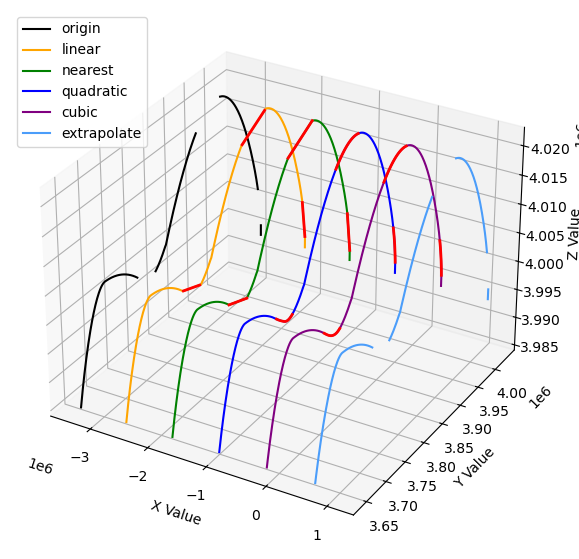

In [33]:
# 각 보간 방법에 따른 X 값의 오프셋을 설정
offsets = {
    'origin': 0,
    'linear': 800000,    
    'nearest': 1600000,
    # 'slinear': 300000,
    'quadratic': 2400000,
    'cubic': 3200000,
    'extrapolate': 4000000
}

# 3D 그래프를 그립니다.
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(111, projection='3d')

# 각 보간 방법에 따른 데이터를 그래프에 추가
# X 값에 오프셋을 더하여 구분이 가도록
ax.plot3D(df_filtered['X'], df_filtered['Y'], df_filtered['Z'], 'black', label='origin')

ax.plot3D(linear_interpolated['X'] + offsets['linear'], linear_interpolated['Y'], linear_interpolated['Z'], 'orange', label='linear')
ax.plot3D(linear_interpolated['X'].iloc[empty_idx1] + offsets['linear'], linear_interpolated['Y'].iloc[empty_idx1], linear_interpolated['Z'].iloc[empty_idx1], 'red', linewidth='2')
ax.plot3D(linear_interpolated['X'].iloc[empty_idx2] + offsets['linear'], linear_interpolated['Y'].iloc[empty_idx2], linear_interpolated['Z'].iloc[empty_idx2], 'red', linewidth='2')
ax.plot3D(linear_interpolated['X'].iloc[empty_idx3] + offsets['linear'], linear_interpolated['Y'].iloc[empty_idx3], linear_interpolated['Z'].iloc[empty_idx3], 'red', linewidth='2')

ax.plot3D(nearest_interpolated['X'] + offsets['nearest'], nearest_interpolated['Y'], nearest_interpolated['Z'], 'green', label='nearest')
ax.plot3D(nearest_interpolated['X'].iloc[empty_idx1] + offsets['nearest'], nearest_interpolated['Y'].iloc[empty_idx1], nearest_interpolated['Z'].iloc[empty_idx1], 'red', linewidth='2')
ax.plot3D(nearest_interpolated['X'].iloc[empty_idx2] + offsets['nearest'], nearest_interpolated['Y'].iloc[empty_idx2], nearest_interpolated['Z'].iloc[empty_idx2], 'red', linewidth='2')
ax.plot3D(nearest_interpolated['X'].iloc[empty_idx3] + offsets['nearest'], nearest_interpolated['Y'].iloc[empty_idx3], nearest_interpolated['Z'].iloc[empty_idx3], 'red', linewidth='2')

# ax.plot3D(slinear_interpolated['X'] + offsets['slinear'], slinear_interpolated['Y'], slinear_interpolated['Z'], 'green', label='slinear')

ax.plot3D(quadratic_interpolated['X'] + offsets['quadratic'], quadratic_interpolated['Y'], quadratic_interpolated['Z'], 'blue', label='quadratic')
ax.plot3D(quadratic_interpolated['X'].iloc[empty_idx1] + offsets['quadratic'], quadratic_interpolated['Y'].iloc[empty_idx1], quadratic_interpolated['Z'].iloc[empty_idx1], 'red', linewidth='2')
ax.plot3D(quadratic_interpolated['X'].iloc[empty_idx2] + offsets['quadratic'], quadratic_interpolated['Y'].iloc[empty_idx2], quadratic_interpolated['Z'].iloc[empty_idx2], 'red', linewidth='2')
ax.plot3D(quadratic_interpolated['X'].iloc[empty_idx3] + offsets['quadratic'], quadratic_interpolated['Y'].iloc[empty_idx3], quadratic_interpolated['Z'].iloc[empty_idx3], 'red', linewidth='2')


ax.plot3D(cubic_interpolated['X'] + offsets['cubic'], cubic_interpolated['Y'], cubic_interpolated['Z'], 'purple', label='cubic')
ax.plot3D(cubic_interpolated['X'].iloc[empty_idx1] + offsets['cubic'], cubic_interpolated['Y'].iloc[empty_idx1], cubic_interpolated['Z'].iloc[empty_idx1], 'red', linewidth='2')
ax.plot3D(cubic_interpolated['X'].iloc[empty_idx2] + offsets['cubic'], cubic_interpolated['Y'].iloc[empty_idx2], cubic_interpolated['Z'].iloc[empty_idx2], 'red', linewidth='2')
ax.plot3D(cubic_interpolated['X'].iloc[empty_idx3] + offsets['cubic'], cubic_interpolated['Y'].iloc[empty_idx3], cubic_interpolated['Z'].iloc[empty_idx3], 'red', linewidth='2')

ax.plot3D(df_filtered2['X'] + offsets['extrapolate'], df_filtered2['Y'], df_filtered2['Z'], '#4B9DFA', label='extrapolate')

ax.set_xlabel('X Value')
ax.set_ylabel('Y Value')
ax.set_zlabel('Z Value')
# ax.view_init(elev=45, azim=10)
ax.legend()

plt.show()

In [34]:
df.iloc[20:50]

,Time,X,Y,Z,Vx,Vy,Vz,dVel_X,dVel_Y,dVel_Z,Alt(m)
20,21.0,-2901374.96,4028212.47,3995899.46,-318.93,1.09,151.71,-20.20,-5.58878,5.87993,3026.25
21,22.0,-2901724.67,4028204.48,3996059.76,-339.45,-4.96,157.44,-20.53,-6.05090,5.72774,3280.94
22,23.0,-2902095.45,4028189.76,3996225.59,-360.33,-11.47,163.03,-20.88,-6.50270,5.59444,3544.45
23,24.0,-2902487.63,4028167.88,3996396.82,-381.56,-18.41,168.50,-21.23,-6.94574,5.46700,3816.58
24,25.0,-2902901.57,4028138.40,3996573.34,-403.15,-25.79,173.85,-21.59,-7.38102,5.34600,4097.15
25,26.0,-2903337.65,4028100.89,3996755.04,-425.10,-33.60,179.08,-21.95,-7.80959,5.23203,4385.99
26,27.0,-2903796.24,4028054.94,3996941.80,-447.43,-41.83,184.20,-22.32,-8.23253,5.12559,4682.96
27,28.0,-2904277.72,4028000.13,3997133.55,-470.13,-50.49,189.23,-22.70,-8.65099,5.02720,4987.90
28,29.0,-2904782.50,4027936.04,3997330.18,-493.23,-59.55,194.17,-23.10,-9.06616,4.93732,5300.70
29,30.0,-2905311.00,4027862.27,3997531.63,-516.74,-69.03,199.02,-23.51,-9.47927,4.85641,5621.23


In [35]:
cubic_interpolated.head(30)

,Time,X,Y,Z,Vx,Vy,Vz,dVel_X,dVel_Y,dVel_Z,Alt(m)
0,10,-2.898223e+06,4.027640e+06,3.994031e+06,-10.31,4.23,7.68,-10.31,4.23464,7.68321,58.28
1,20,-2.898251e+06,4.027649e+06,3.994050e+06,-21.85,7.21,15.14,-11.54,2.97611,7.45338,88.17
2,30,-2.898288e+06,4.027664e+06,3.994077e+06,-31.86,12.52,23.38,-10.01,5.30697,8.24089,131.78
3,40,-2.898332e+06,4.027688e+06,3.994114e+06,-40.50,19.90,32.32,-8.64,7.38467,8.93850,190.16
4,50,-2.898385e+06,4.027720e+06,3.994160e+06,-48.89,27.76,41.44,-8.38,7.86052,9.12520,263.20
5,60,-2.898450e+06,4.027756e+06,3.994214e+06,-59.28,33.53,50.15,-10.39,5.77023,8.70512,349.74
6,70,-2.898527e+06,4.027796e+06,3.994277e+06,-71.27,37.72,58.57,-11.99,4.18478,8.42422,449.44
7,80,-2.898618e+06,4.027838e+06,3.994348e+06,-84.42,40.78,66.81,-13.15,3.06362,8.23535,562.07
8,90,-2.898724e+06,4.027882e+06,3.994427e+06,-98.50,42.94,74.88,-14.07,2.15500,8.07574,687.40
9,100,-2.898845e+06,4.027927e+06,3.994514e+06,-113.40,44.23,82.79,-14.90,1.29752,7.90467,825.16


In [36]:
# # 데이터프레임 전체 다 나오게하기
# pd.set_option('display.max_rows', None)

In [37]:
abs((df[['X']][blanc_mask] - linear_interpolated[['X']][blanc_mask])/df[['X']][blanc_mask]).sum()

X    0.03052
dtype: float64

In [38]:
a = abs((df[['X', 'Y', 'Z']][blanc_mask] - linear_interpolated[['X', 'Y', 'Z']][blanc_mask])/df[['X', 'Y', 'Z']][blanc_mask]).sum()/97 * 100
round(a.mean(),5)

0.02433

In [39]:
a = abs((df[['X', 'Y', 'Z']][blanc_mask] - nearest_interpolated[['X', 'Y', 'Z']][blanc_mask])/df[['X', 'Y', 'Z']][blanc_mask]).sum()/97 * 100
round(a.mean(),5)

0.21086

In [40]:
a = abs((df[['X', 'Y', 'Z']][blanc_mask] - quadratic_interpolated[['X', 'Y', 'Z']][blanc_mask])/df[['X', 'Y', 'Z']][blanc_mask]).sum()/97 * 100
round(a.mean(),5)

0.00161

In [41]:
a = abs((df[['X', 'Y', 'Z']][blanc_mask] - cubic_interpolated[['X', 'Y', 'Z']][blanc_mask])/df[['X', 'Y', 'Z']][blanc_mask]).sum()/97 * 100
round(a.mean(),5)

0.00153

In [42]:
a = sum(abs((df['X'] - cubic_interpolated['X'])/97))/97 * 100
b = sum(abs((df['Y'] - cubic_interpolated['Y'])/97))/97 * 100
c = sum(abs((df['Z'] - cubic_interpolated['Z'])/97))/97 * 100
# b = sum(df['Y'] - linear_interpolated['Y'])
# c = sum(df['Z'] - linear_interpolated['Z'])
(a+b+c)/3

58.14694369971795

In [43]:
a = sum(abs(df['X'] - cubic_interpolated['X']))
b = sum(abs(df['Y'] - cubic_interpolated['Y']))
c = sum(abs(df['Z'] - cubic_interpolated['Z']))

(a+b+c)/3/97

56.40253538872624

In [44]:
print(sum(abs(df['X'] - nearest_interpolated['X'])))
print(sum(abs(df['Y'] - nearest_interpolated['Y'])))
print(sum(abs(df['Z'] - nearest_interpolated['Z'])))

1153356.269999992
835510.2099999962
111658.51999999397


In [45]:
import numpy as np

# MAPE 계산 함수 정의
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# 원본 데이터에서 보간된 데이터와 동일한 'Time' 값을 가진 데이터만 필터링
def filter_original_data(df_original, df_interpolated):
    return df_original[df_original['Time'].isin(df_interpolated['Time'])]

# 원본 데이터와 보간된 데이터 간의 유사도 계산
mape_scores = {}
for kind in ['linear', 'nearest', 'slinear', 'quadratic', 'cubic']:
    interpolated_data = results[kind]
    filtered_original = filter_original_data(df, interpolated_data)
    
    # 각 축(X, Y, Z)에 대한 MAPE 계산
    for column in ['X', 'Y', 'Z']:
        mape_score = calculate_mape(filtered_original[column], interpolated_data[column])
        mape_scores[f'{kind}_{column}'] = mape_score

mape_scores

ValueError: operands could not be broadcast together with shapes (36,) (365,) 

In [ ]:
# 원본 데이터프레임과 각 보간된 데이터프레임 사이의 절대 차이의 평균을 계산하는 함수
def calculate_similarity(original, interpolated):
    # 원본과 보간 데이터 사이의 절대 차이 계산
    difference = abs(original.copy() * 100 - interpolated.copy() * 100)
    # 절대 차이의 평균 계산
    mean_difference = difference.mean().mean()  # 두 번째 .mean()은 모든 컬럼에 대한 평균을 구하기 위함
    
    # 전체 값 범위에 대한 비율로 변환 (예시에서는 단순화를 위해 최대-최소 범위를 사용)
    max_val = original.max().max()
    min_val = original.min().min()
    range_val = max_val - min_val
    
    # 유사도 백분율 계산
    similarity_percentage = (1 - (mean_difference / range_val)) * 100
    return similarity_percentage

# 각 보간 방법에 대한 유사도 계산
results = {
    'linear': calculate_similarity(df[['X', 'Y', 'Z']][blanc_mask], linear_interpolated[['X', 'Y', 'Z']][blanc_mask]),
    'nearest': calculate_similarity(df[['X', 'Y', 'Z']][blanc_mask], nearest_interpolated[['X', 'Y', 'Z']][blanc_mask]),
    'slinear': calculate_similarity(df[['X', 'Y', 'Z']][blanc_mask], slinear_interpolated[['X', 'Y', 'Z']][blanc_mask]),
    'quadratic': calculate_similarity(df[['X', 'Y', 'Z']][blanc_mask], quadratic_interpolated[['X', 'Y', 'Z']][blanc_mask]),
    'cubic': calculate_similarity(df[['X', 'Y', 'Z']][blanc_mask], cubic_interpolated[['X', 'Y', 'Z']][blanc_mask]),
}

print(results)


{'linear': 98.82252023561668, 'nearest': 90.10156120934894, 'slinear': 98.82252023561664, 'quadratic': 99.91863515999705, 'cubic': 99.92265531719217}


In [ ]:
diff = abs(df - linear_interpolated)

In [ ]:
diff[diff.X > 0]

,Time,X,Y,Z,Vx,Vy,Vz,dVel_X,dVel_Y,dVel_Z,Alt(m)
20,189.0,358.669000,148.823333,71.113000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,198.0,696.658000,291.366667,136.576000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,207.0,1013.577000,427.180000,196.509000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,216.0,1309.096000,555.833333,251.042000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,225.0,1582.855000,676.886667,300.285000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
254,2295.0,60.243333,687.730000,427.431667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,2304.0,62.068667,552.274000,337.013333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,2313.0,56.794000,415.678000,249.085000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,2322.0,44.599333,278.052000,163.626667,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
diff[['X', 'Y', 'Z']][blanc_mask] * 100

,X,Y,Z
20,35866.900000,14882.333333,7111.300000
21,69665.800000,29136.666667,13657.600000
22,101357.700000,42718.000000,19650.900000
23,130909.600000,55583.333333,25104.200000
24,158285.500000,67688.666667,30028.500000
...,...,...,...
254,6024.333333,68773.000000,42743.166667
255,6206.866667,55227.400000,33701.333333
256,5679.400000,41567.800000,24908.500000
257,4459.933333,27805.200000,16362.666667
